In [1]:
import os
print (os.getcwd())

C:\Users\ashwini.bm\AUTO-ML


In [178]:
#Import all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno #library to visualize missing data
import re#library for regular expression

from sklearn.preprocessing import MinMaxScaler,Normalizer,StandardScaler,RobustScaler,LabelEncoder, OneHotEncoder 
from sklearn.decomposition import PCA

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor 

In [3]:
#Function to read data to dataframe

def read_file_to_df(filepath):
    
    df_loaded_ind=True
    df = pd.DataFrame()
    
    if filepath.endswith(".csv"):
        df = pd.read_csv(filepath)
        
    elif (filepath.endswith(".xls") | filepath.endswith(".xlsx")):
        df = pd.read_excel(filepath)
        
    else:
        df_loaded_ind=False
        print('Invalid file type')
            
    return df_loaded_ind,df

In [170]:
data_loaded_ind,data=read_file_to_df('C:/Users/ashwini.bm/AUTO-ML/forest_cover.csv')

In [156]:
data_loaded_ind

True

In [157]:
data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [171]:
data=data[['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways','Hillshade_9am','Hillshade_Noon','Hillshade_3pm']]
mn=data.values.mean()

In [145]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,15120.0,2749.322553,417.678187,1863.0,2376.0,2752.0,3104.0,3849.0
Aspect,15120.0,156.676653,110.085801,0.0,65.0,126.0,261.0,360.0
Slope,15120.0,16.501587,8.453927,0.0,10.0,15.0,22.0,52.0
Horizontal_Distance_To_Hydrology,15120.0,227.195701,210.075296,0.0,67.0,180.0,330.0,1343.0
Vertical_Distance_To_Hydrology,15120.0,51.076521,61.239406,-146.0,5.0,32.0,79.0,554.0
Horizontal_Distance_To_Roadways,15120.0,1714.023214,1325.066358,0.0,764.0,1316.0,2270.0,6890.0
Hillshade_9am,15120.0,212.704299,30.561287,0.0,196.0,220.0,235.0,254.0
Hillshade_Noon,15120.0,218.965608,22.801966,99.0,207.0,223.0,235.0,254.0
Hillshade_3pm,15120.0,135.091997,45.895189,0.0,106.0,138.0,167.0,248.0


In [34]:
#Function to get the ratio of null values in columns of dataset in descending order
def get_null_count(df):
   
    na_count=df.isnull().sum().sort_values(ascending=False)/len(df)#columnwise ratio of null values
    na_count=na_count[na_count>0]#choose only the columns whic have null values

    return na_count
        

In [35]:
#Function to visualize the null value distribution
def visualize_null_count(df,null_count):

    filtered_data = msno.nullity_filter(df,  filter='bottom',n=len(null_count))
    msno.matrix(filtered_data)
        

In [92]:
if data.isnull().values.any():
    na_count=get_null_count(data)
    print(na_count)
    visualize_null_count(data,na_count)

In [106]:
#Function to drop desired columns
def drop_columns(df,columnlist=[]):
    if columnlist:
        df.drop(columnlist,axis=1,inplace=True)#Drop all the columns in the list
    return df

In [107]:
data=drop_columns(data,columnlist=['MiscVal','MiscFeature'])

In [42]:
#Function to impute missing values
def impute_missing(df, drop_nans=False):  

    #drop the rows containing null values if drop_nans is set to True
    if drop_nans:
        df.dropna(inplace=True)
    else:
        for column in df.columns.values:
        # Replace NaNs with the median or mode of the column depending on the column type
            try:
                column_median = df[column].median()
                df[column].fillna(column_median, inplace=True)

            except TypeError:
                column_mode = df[column].mode()[0]
                df[column].fillna(column_mode, inplace=True)
                
    if df.isnull().values.any():
        print('Error in replacing missing values')
    else:
        print('Missing values are successfully replaced')
    
    return df
    

In [76]:
data=impute_missing(data)

Missing values are successfully replaced


In [77]:
data.dtypes#display the data types of every feature

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

In [102]:
#Function to convert datatype of mentioned columns to corresponding mentioned types
def data_type_converter(df,column_names=[],to_types=[],datatypconv_ind=False):
    
    if datatypconv_ind:
        
        if (isinstance(column_names, list) & isinstance(to_types, list)):

            for col,typ in zip(column_names,to_types):
                df[col] = df[col].astype(typ) 

    return df

In [103]:
data_type_converted= data_type_converter(data,column_names=['MSSubClass','SalePrice'],to_types=['int','int'],datatypconv_ind=True)

In [104]:
data_type_converted.dtypes

Id                 int64
MSSubClass         int32
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [105]:
data = data_type_converted

In [360]:
#Function to splite timestamp/date column into sub features
def date_splitter(df, fldname, drop=True):
    
    #convert the specified feature to timestamp format if not already
    fld = df[fldname] 
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, 
                                     infer_datetime_format=True)
        
    targ_pre = re.sub('[Dd]ate$', '', fldname)#substitute the phrase 'date' by spaces in the original field name
    
    #obtain different sub features for the date column
    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 
            'Dayofyear', 'Is_month_end', 'Is_month_start', 
            'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 
            'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    
    if drop: df.drop(fldname, axis=1, inplace=True)#drop the original date field 
    
    return df

In [ ]:
data =  date_splitter(data,)

In [148]:
#Function to convert date field to its Julian format
def Juliandtconv(df,fldname,drop=True):
    
    #convert the specified feature to timestamp format if not already
    df[fldname]=pd.to_datetime(df[fldname],infer_datetime_format=True)
    
    df[fldname+'Julian'] = df[fldname].apply(lambda x: x.to_julian_date())
    
    if drop: df.drop(fldname, axis=1, inplace=True)#drop the original date field 
        
    return  df

In [159]:
df=Juliandtconv(df, 'sdate',drop=True)
df

,nothing,sdateJulian
0,a,2458449.5
1,b,2458449.5


In [158]:
import datetime as dt
df = pd.DataFrame()
df['sdate']=[datetime.datetime.today().strftime('%Y-%m-%d'),datetime.datetime.today().strftime('%Y-%m-%d')]
df['nothing']=['a','b']
df.head()

,sdate,nothing
0,2018-11-27,a
1,2018-11-27,b


In [ ]:
123.45 0.55
123.44 0.49

In [93]:
#Convert categorical features to numerical
def encoding(df):
    
    #By defaault, convert all the categories to numerical forms using Label encoder
    enc        = LabelEncoder()
    encoded_df = df.apply(enc.fit_transform)

    return encoded_df

In [94]:
data=encoding(data)
data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
0,657,51,3,34,92,108,142,118,146
1,651,56,2,24,86,68,141,121,149
2,865,139,9,35,157,1871,155,124,133
3,846,155,18,30,210,1820,159,124,120
4,656,45,2,14,91,69,141,120,148


In [78]:
#Function to separate data and target variable asuming last feature is the target variable
def separate_target(df_raw,target):
    
    df     = df_raw.iloc[:,:-1] #data without the last variable(target variable)
    target = df_raw.iloc[:,-1]  #target variable only
    
    return df,target


In [79]:
data,target=separate_target(data,'SalePrice')

In [164]:
#Function to bring all data into same scale
def scale_data(df,scaling_type='MinMax'):  
    
    if scaling_type:
        scaler = MinMaxScaler()#scales based on minimum and maximum values in dataset
        
    if scaling_type == 'Standardize':
        scaler = StandardScaler()#scales based on mean and standard deviation of dataset setting mean to 0 and standard deviation to 1
        
    if scaling_type == 'Robustscale':
        scaler = RobustScaler()#scales based on interquartile range of data

    return pd.DataFrame(scaler.fit_transform(df),columns=df.columns)


In [172]:
scaled_data = scale_data(data)


Object `normalize` not found.


In [173]:
scaled_data.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm
0,0.369084,0.141667,0.057692,0.192107,0.208571,0.074020,0.870079,0.858065,0.596774
1,0.366062,0.155556,0.038462,0.157856,0.200000,0.056604,0.866142,0.877419,0.608871
2,0.473817,0.386111,0.173077,0.199553,0.301429,0.461538,0.921260,0.896774,0.544355
3,0.464250,0.430556,0.346154,0.180194,0.377143,0.448476,0.937008,0.896774,0.491935
4,0.368580,0.125000,0.038462,0.113924,0.207143,0.056749,0.866142,0.870968,0.604839


In [15]:
#Visualize correlation between various features in dataset
def halfHeatMap_corr(df, mirror=False,figsize_x=20, figsize_y=20):

    # Create Correlation df
    corr = df.corr()
    # Plot figsize
    fig, ax = plt.subplots(figsize=(figsize_x, figsize_y))
    # Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)

    if mirror == False:
        # Drop self-correlations
        dropSelf = np.zeros_like(corr)
        dropSelf[np.triu_indices_from(dropSelf)] = True
        
    # Generate heatmap with mask on redundant values with a precision of 2 
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf)

    plt.show()

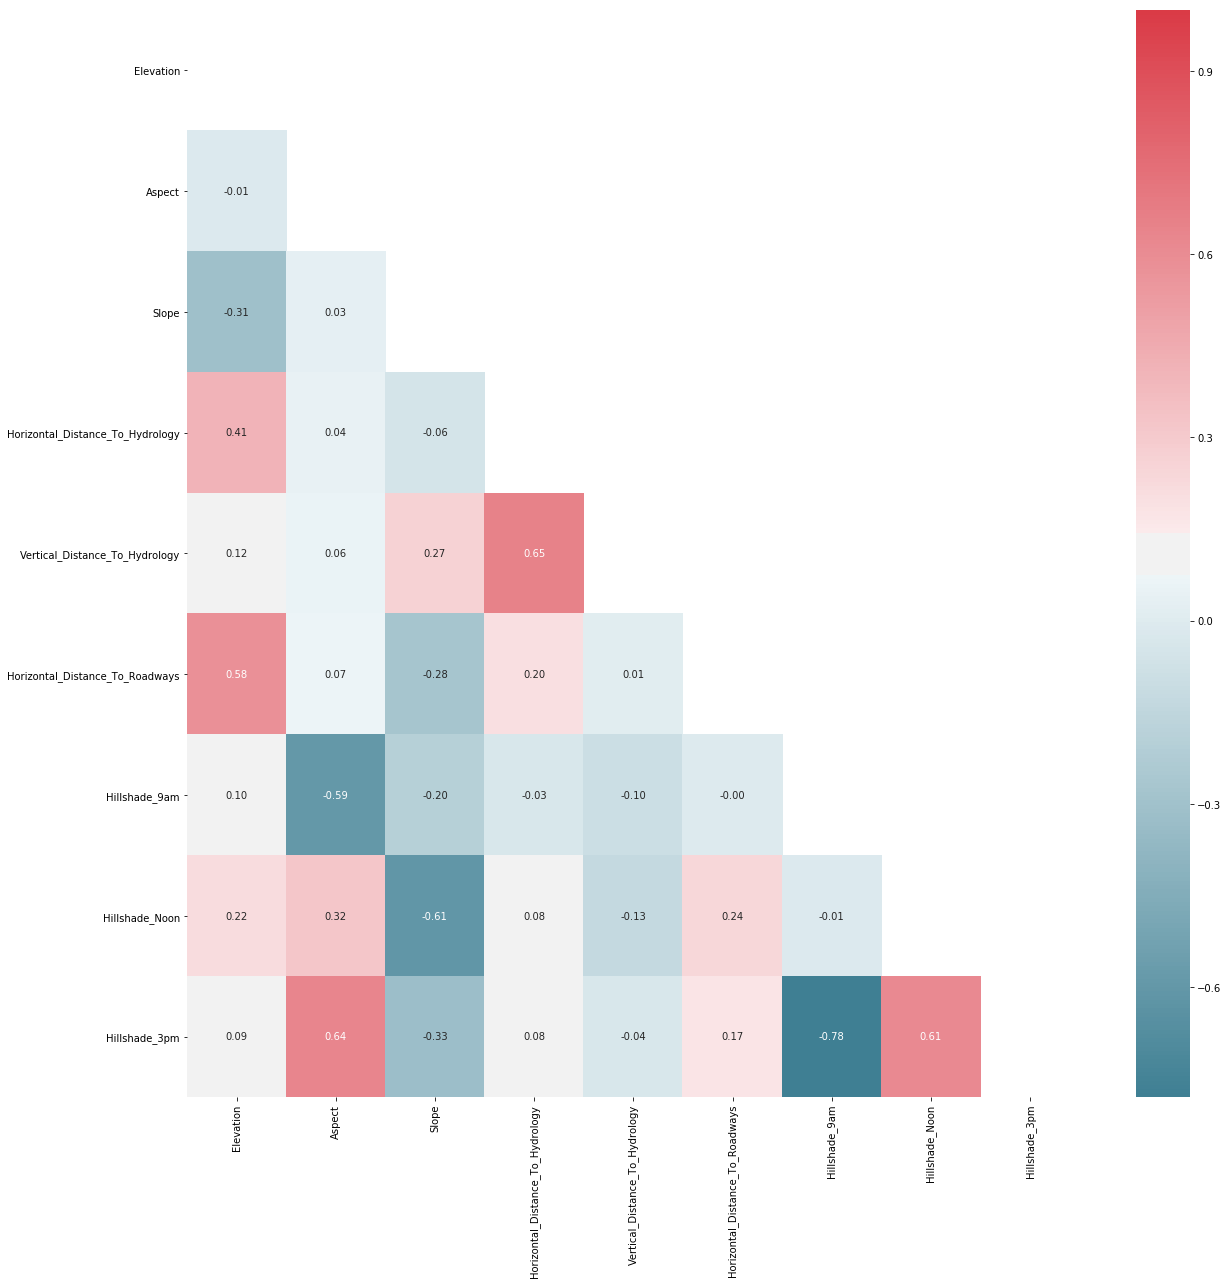

In [16]:
halfHeatMap_corr(scaled_data)

In [348]:
#Function to drop one of the two correlated features, the correlation coeffiecient is higher than the threshold
def drop_highly_corr_features(df,threshold=0.95):
    # Create correlation matrix
    corr_matrix = df.corr().abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find index of feature columns with correlation greater than 0.95
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    #drop the column
    df.drop(to_drop,axis =1,inplace=True)

In [349]:
drop_highly_corr_features(df,threshold=0.8)

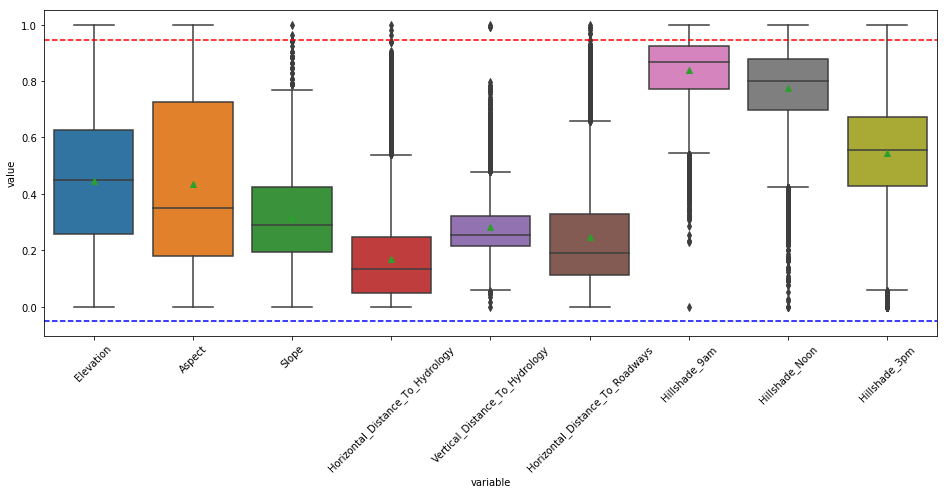

In [195]:
#Function to visualize outliers in the data
def plotoutliers(df,collist=[],figsize_x=16,figsize_y=6):
    
    #If the feature whose outliers are to be visualized, consider only those features else consider all continuous variables
    if collist:
        df=df[collist]
    else:
        df=df._get_numeric_data()

    plt.figure(figsize=(figsize_x, figsize_y))#specify the size of the figure
    ax=sns.boxplot(x="variable", y="value", data=pd.melt(df),showmeans=True)#plot outliers
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45)#rotate the labels so as to adjust space
    #ax = sns.stripplot(x="variable", y="value", data=pd.melt(df))
    threshold = get_outlier_threshold(df)
    ax.axhline(y=threshold[0], color='r',linestyle='--')
    ax.axhline(y=threshold[1], color='b',linestyle='--')

    plt.show()
    
    return threshold
    

plotoutliers(scaled_data)

In [188]:
scaled_data['Hillshade_Noon'].max()

1.0

In [149]:
def get_outlier_threshold(df):
    
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    
    IQR=Q3-Q1
    #print(Q3+1.5*IQR)
    
    upper_threshold  = (Q3+1.5*IQR).mean()
    lower_threshold  = (Q1-1.5*IQR).mean()
    #print(Q3+1.5*IQR)
        
    return (upper_threshold,lower_threshold)
 

In [78]:
threshold = get_outlier_threshold(scaled_data)

Elevation                           1.174723
Aspect                              1.541667
Slope                               0.769231
Horizontal_Distance_To_Hydrology    0.539464
Vertical_Distance_To_Hydrology      0.480000
Horizontal_Distance_To_Roadways     0.657329
Hillshade_9am                       1.155512
Hillshade_Noon                      1.148387
Hillshade_3pm                       1.042339
dtype: float64


In [20]:
#Function to drop rows which contain outliers
def remove_outliers(df,column,method='IQR',threshold):
    #Default method is to filter outliers on the basis of interquartile range as we need the data to be normally distributed to filter data based on standard deviation
    
    if method:

        Q1      = df[column].quantile(0.25)#1st qaurtile of the feature
        Q3      = df[column].quantile(0.75)#3rd quartile of the feature
        IQR     = Q3 - Q1#interquartile range

        df = df[~((df[column] < (Q1 - 1.5 * IQR)) |(df[column] > (Q3 + 1.5 * IQR)))]
    
    if method =='threshold':

        df = df[~((df[column] < thresold[1] |(df[column] > thresold[0]))]
        
    if method == 'std':
        
        mean = df[column].mean()#mean of the feature
        std  = df[column].std()#standard deviation of the feature
        
        df = df[df[column] < (3*std + mean)]
        
    return df


In [152]:
data=remove_outliers(scaled_data,'Elevation',method = 'std')

In [119]:
def remove_outliers1(df,method='IQR'):
    #Default method is to filter outliers on the basis of interquartile range as we need the data to be normally distributed to filter data based on standard deviation
    df=pd.DataFrame(df.values)
    if method:

        Q1      = df.quantile(0.25)#1st qaurtile of the feature
        Q3      = df.quantile(0.75)#3rd quartile of the feature
        IQR     = Q3 - Q1#interquartile range

        df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))]
        
    if method == 'std':
        
        mean = df[column].mean()#mean of the feature
        std  = df[column].std()#standard deviation of the feature
        
        df = df[df[column] < (3*std + mean)]
        
    return df

In [ ]:
rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 42)
rnd_clf.fit(data.iloc[:,0:30],data.iloc[:,30]);x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, data.iloc[:,0:30].columns), reverse = False)))

trace2 = go.Bar(x=x, y=y, marker=dict(color=x, colorscale = 'Viridis', reversescale = True), 
                name='Random Forest Feature importance', orientation='h', )

layout = dict(title='Barplot of Feature importances', width = 600, height = 1000, 
              yaxis=dict(showgrid=False, showline=False, showticklabels=True, ), margin=dict(l=300, ), )

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [ ]:
for name, importance in zip(data.iloc[:,0:30].columns, rnd_clf.feature_importances_):
    if importance > 0.020:
        print('"' + name + '"'+',')

In [ ]:
data.drop(['Time'], axis =1, inplace = True)
data.head()

In [113]:
#Function to visualize distribution of different levels of categorical variable 
def check_distribution(df,col=None):
    pd.value_counts(df[col]).sort_values(ascending=False).plot(kind="bar")#obtain count of different categories in descending order
    

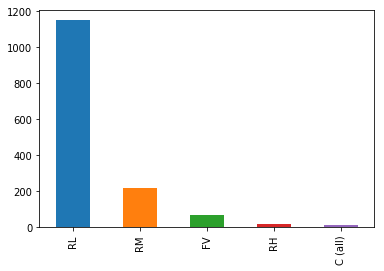

In [114]:
check_distribution(data,'MSZoning')

In [ ]:
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import TomekLinks, NeighbourhoodCleaningRule, CondensedNearestNeighbour, RandomUnderSampler, ClusterCentroids
from imblearn.over_sampling import SMOTE

Undersampling Methods: It reduces the number of observations from majority class to balance the data set. The various methods of undersampling implemented in this notebook includes:
•UnderSampler: Randomly under-samples the majority class with replacement
•TomekLinks: Identifies all Tomek links between the majority and minority classes
•ClusterCentroids: Under-sampling with Cluster Centroids using K-means
•NearMiss method: Selects the majority class samples which are close to some minority class samples
•Condensed Nearest Neighbour: Selects subset of instances that are able to correctly classifying the original datasets using one-nearest neighbor rule.
•One Side Selection: Method resulting from the application of Tomek links followed by Condensed Nearest Neighbor.
•Neighborhood Cleaning Rule: Utilizes the one-sided selection principle, but considers more carefully the quality of the data to be removed


In [ ]:
#Applying undersampling technique TomeLinks only for OCSVM model as it cannot handle the oversampled data.
#dsamp = TomekLinks(random_state=RANDOM_SEED, n_jobs=16)
dsamp = NeighbourhoodCleaningRule(random_state=RANDOM_SEED, n_jobs=16)
#dsamp = ClusterCentroids(random_state=RANDOM_SEED, n_jobs=16)
X_resampled, y_resampled = dsamp.fit_sample(X_train, y_train)
colors = ['blue' if v == 0 else 'red' if v == 1 else 'black' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("NeighbourhoodCleaningRule Output")

X_train = X_resampled
y_train = y_resampled

In [ ]:
print ('train Shape: ', X_train.shape, y_train.shape)
print ('test Shape: ', X_test.shape, y_test.shape)

Oversampling Methods: Replicates the observations from minority class to balance the data. The various methods of oversampling implemented in this notebook includes:
•RandomOverSampler: Randomly over-samples the minority class with replacement.
•SMOTE- Synthetic Minority Over-sampling Technique: It works by creating synthetic samples from the minor class instead of creating copies.
•bSMOTE- Borderline SMOTE: Minority samples near the borderline are over-sampled.
•SVM_SMOTE- Support Vectors SMOTE: The SVM smote model fits a support vector machine classifier to the data and uses the support vector to provide a notion of boundary. Unlike regular smote, where such notion relies on proportion of nearest neighbours belonging to each class.
•SMOTE + Tomek links (Combines Over-sampling followed by under-sampling): Performs over-sampling using SMOTE and cleaning using Tomek links.
•SMOTE + ENN (Combines Over-sampling followed by under-sampling): Performs over-sampling using SMOTE and cleaning using Edited Nearest Neighbours (ENN).
•EasyEnsemble: Create an ensemble of balanced sets by iteratively under-sampling the imbalanced dataset using an estimator.
•BalanceCascade: BalanceCascade is similar to EasyEnsemble except that it removes correctly classified major class examples of trained learners from further consideration.

Apply sampling techniques on train dataset to get balanced dataset:

Note: The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of information loss (bringing 492 non-fraud transaction from 284,315 non-fraud transaction)

Understanding SMOTE:
•Solving the Class Imbalance: SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class.
•Location of the synthetic points: SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points.
•Final Effect: More information is retained since we didn't have to delete any rows unlike in random undersampling.
•Accuracy || Time Tradeoff: Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.


In [ ]:
#Applying oversampling technique for other models.
#dsamp = TomekLinks(random_state=RANDOM_SEED, n_jobs=16)
#dsamp = NeighbourhoodCleaningRule(random_state=RANDOM_SEED, n_jobs=16)
#dsamp = SMOTETomek(random_state=RANDOM_SEED, n_jobs=16)
#dsamp = SMOTE(random_state=RANDOM_SEED, n_jobs=16)
dsamp = SMOTEENN(random_state=RANDOM_SEED, n_jobs=16)

X_resampled, y_resampled = dsamp.fit_sample(X_train_s, y_train_s)
colors = ['blue' if v == 0 else 'red' if v == 1 else 'black' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("SMOTEENN Output")

X_train = X_resampled
y_train = y_resampled

In [394]:
##Function to reduce the number of features in the data
def dimreduction(df):
    
    components_required=min(30,len(df.columns)) #if number of features < 30, then reduce dimension to to number of features else to 30
    pca = PCA(n_components = components_required)
    principalComponents = pca.fit_transform(df.iloc[:,:].values)#converting data to array so as to fit
    principalDf = pd.DataFrame(data = principalComponents)#convert compressed data to dataframe
    
    return principalDf

In [395]:
df=dimreduction(df)
len(df.columns)

30

In [396]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.499701,-0.358370,0.549640,0.328894,0.151279,-0.708721,-0.227153,0.020012,-0.129009,-0.052395,...,-0.077521,-0.001428,0.359256,0.162282,0.078814,-0.012766,-0.120193,-0.066977,0.028877,-0.093629
1,0.266706,0.757637,0.287876,-0.334982,0.067541,-0.412474,0.274829,-0.004326,-0.333431,-0.243072,...,0.084488,-0.272225,-0.379072,-0.298871,0.012626,-0.002600,0.313720,0.141162,-0.210902,-0.042606
2,0.858664,-0.094974,-0.110479,0.546933,-0.300334,-0.200529,-0.532917,0.264791,-0.076069,-0.036447,...,-0.037095,0.021042,0.107051,0.300606,0.076954,0.028022,0.017837,-0.020943,-0.234049,-0.120691
3,-0.402155,0.227135,-0.839407,0.616191,-0.419489,-0.290180,0.596925,0.340826,0.185122,-0.559185,...,0.121794,-0.076094,0.516877,-0.480076,0.087226,0.220907,0.342021,0.156103,-0.447154,-0.144596
4,1.458981,0.178788,-0.445661,0.610828,0.041235,-0.031072,0.135995,0.458918,-0.244872,0.057653,...,0.087243,-0.037066,-0.161611,0.083197,0.116049,-0.084612,0.029588,-0.048052,-0.092953,-0.105468
